In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,\
      MaxPool2D, Conv2D, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint 

In [2]:
!wget https://www.dropbox.com/s/dnlwij5gjtc2p8l/cxr_npy.zip?dl=0 -O cxr_npy.zip

--2020-08-31 15:50:23--  https://www.dropbox.com/s/dnlwij5gjtc2p8l/cxr_npy.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dnlwij5gjtc2p8l/cxr_npy.zip [following]
--2020-08-31 15:50:23--  https://www.dropbox.com/s/raw/dnlwij5gjtc2p8l/cxr_npy.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd6468557c16cf8d44c31988c01.dl.dropboxusercontent.com/cd/0/inline/A-htOIaHbfYOQ1StBCd81_aJ2CWfyIbFqaN85SINxZ_c59GEQO38xfU3JviKKdHlNL5BQM7vxWmSyhaXH44_5tDCVRx2PXPixYBs-fZlSE8vSt6vwYnU2fQZ2p3oVSAW-3k/file# [following]
--2020-08-31 15:50:24--  https://ucd6468557c16cf8d44c31988c01.dl.dropboxusercontent.com/cd/0/inline/A-htOIaHbfYOQ1StBCd81_aJ2CWfyIbFqaN85SINxZ_c59GEQO38xfU3JviKKdHlNL5BQM7vxWmSyhaXH44_5tDCVRx2PXPixYBs-fZlSE8vS

In [3]:
!unzip cxr_npy.zip

Archive:  cxr_npy.zip
   creating: npy/
  inflating: npy/x_test_base.npy     
  inflating: npy/y_train_base.npy    
  inflating: npy/x_train_base.npy    
  inflating: npy/y_test_base.npy     


In [4]:
!ls

cxr_npy.zip  npy  sample_data


In [5]:
x_test = np.load('npy/x_test_base.npy')
y_test = np.load('npy/y_test_base.npy')

In [6]:
x_train = np.load('npy/x_train_base.npy')
y_train = np.load('npy/y_train_base.npy')

In [7]:
x_train = x_train.reshape(x_train.shape[0],299,299,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],299,299,1).astype('float32')
x_train /= 255
x_test /= 255

In [8]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(299,299,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
train_gen = ImageDataGenerator(zoom_range=0.1)
test_gen = ImageDataGenerator()

In [12]:
training_set = train_gen.flow(x_train, y_train)

In [13]:
test_set = train_gen.flow(x_test, y_test)

In [14]:
model_sate_path = 'npy.h5'
checkpoint_callback = ModelCheckpoint(model_sate_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [15]:
len(x_train)//32

21

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 297, 297, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 295, 295, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 295, 295, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 145, 145, 64)      0

In [17]:
history = model.fit(training_set,
                    steps_per_epoch=len(x_train)//32,
                    validation_data=test_set,
                    validation_steps=len(x_test)//32,
                    epochs=32,
                    callbacks=[checkpoint_callback])

Epoch 1/32
21/21 [==============================] - ETA: 0s - loss: 1.6317 - accuracy: 0.5139
Epoch 00001: val_accuracy improved from -inf to 0.55208, saving model to npy.h5
21/21 [==============================] - 16s 744ms/step - loss: 1.6317 - accuracy: 0.5139 - val_loss: 0.6849 - val_accuracy: 0.5521
Epoch 2/32
20/21 [===========================>..] - ETA: 0s - loss: 0.6950 - accuracy: 0.5562
Epoch 00002: val_accuracy did not improve from 0.55208
21/21 [==============================] - 5s 253ms/step - loss: 0.6950 - accuracy: 0.5556 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 3/32
21/21 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5540
Epoch 00003: val_accuracy improved from 0.55208 to 0.76042, saving model to npy.h5
21/21 [==============================] - 25s 1s/step - loss: 0.6908 - accuracy: 0.5540 - val_loss: 0.6563 - val_accuracy: 0.7604
Epoch 4/32
21/21 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.6497
Epoch 00004: v

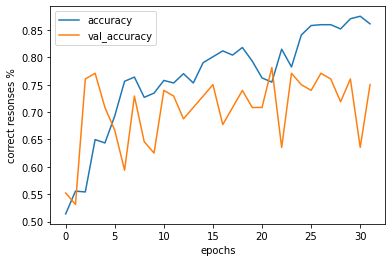

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('correct resonses %')
plt.legend()
plt.show()